<a href="https://colab.research.google.com/github/UmarNauruzov/new-bot-pogoda/blob/master/%D0%9E%D0%B1%D1%83%D1%87%D0%B0%D1%8E%D1%89%D0%B0%D1%8F%2C_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B8_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8_%D0%9F%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9D%D0%A1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание

Используя модуль **datasets** библиотеки **sklearn**, загрузите базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 94%.

---

С помощью метода `.summary()` зафиксируйте количество параметров созданной вами нейронной сети.


#Шаблон ноутбука

In [ ]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential      

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 

# Утилиты для to_categorical()
from tensorflow.keras import utils    

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam  

# Библиотека для работы с массивами
import numpy as np    

# Отрисовка графиков
import matplotlib.pyplot as plt    

# Разделение данных на выборки
from sklearn.model_selection import train_test_split 

# Для загрузки датасета
from sklearn.datasets import load_wine                     

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

##Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [ ]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


##Подготовка данных

In [ ]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data, 
                                                y_data, 
                                                test_size=0.1, 
                                                shuffle=True, 
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную 
x_train, x_val, y_train, y_val = train_test_split(x_all, 
                                                  y_all, 
                                                  test_size=0.1, 
                                                  shuffle=True, 
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


*Обучение модели*



In [ ]:
model = Sequential() # Последовательная модель нейронной сети


In [ ]:

model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                448       
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 3)                 51        
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________


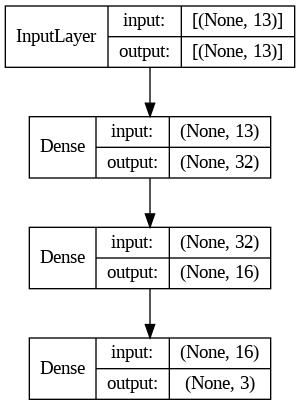

In [ ]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [ ]:
# Компиляция модели
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])



In [ ]:
# Обучение модели с заданными параметрами
history = model.fit(x_train, y_train, 
                    epochs=85, 
                    batch_size=16, 
                    validation_data=(x_val, y_val))


# Вывод графика обучения (точность)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Вывод графика обучения (доля ошибки)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()      

Epoch 1/85
9/9 [==============================] - 2s 28ms/step - loss: 71.9228 - accuracy: 0.3194 - val_loss: 53.2243 - val_accuracy: 0.2500
Epoch 2/85
9/9 [==============================] - 0s 7ms/step - loss: 43.6040 - accuracy: 0.2917 - val_loss: 34.8088 - val_accuracy: 0.3750
Epoch 3/85
9/9 [==============================] - 0s 7ms/step - loss: 32.5223 - accuracy: 0.2222 - val_loss: 25.0689 - val_accuracy: 0.2500
Epoch 4/85
9/9 [==============================] - 0s 9ms/step - loss: 21.8751 - accuracy: 0.2361 - val_loss: 15.2612 - val_accuracy: 0.1875
Epoch 5/85
9/9 [==============================] - 0s 7ms/step - loss: 13.8000 - accuracy: 0.2708 - val_loss: 10.3919 - val_accuracy: 0.2500
Epoch 6/85
9/9 [==============================] - 0s 6ms/step - loss: 9.5026 - accuracy: 0.4097 - val_loss: 7.3136 - val_accuracy: 0.3125
Epoch 7/85
9/9 [==============================] - 0s 7ms/step - loss: 6.0164 - accuracy: 0.4306 - val_loss: 4.1392 - val_accuracy: 0.3750
Epoch 8/85
9/9 [=======

In [ ]:
# Вывод значения точности распознавания на проверочной выборке по эпохам

val_acc = history.history['val_accuracy']

for i in range(5):
    # .format() - метод форматирования данных при выводе
    print('Эпоха: {:2} точность: {:5.1%}'.format(i, val_acc[i]))

Эпоха:  0 точность: 25.0%
Эпоха:  1 точность: 37.5%
Эпоха:  2 точность: 56.2%
Эпоха:  3 точность: 56.2%
Эпоха:  4 точность: 75.0%


In [ ]:
# Предсказание модели
predictions = np.argmax(model.predict(x_test), axis=1)
y_test_nums = np.argmax(y_test, axis=1)

# Вывод результатов тестирования
for i in range(len(x_test)):
    print(f'Предсказано - {predictions[i]}, было {y_test_nums[i]}, {predictions[i] == y_test_nums[i]}')
print(f'\n Процент верных предсказаний - {(predictions == y_test_nums).mean()*100} %')

1/1 [==============================] - 0s 55ms/step
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 1, было 0, False
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 2, было 2, True
Предсказано - 1, было 0, False
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True

 Процент верных предсказаний - 88.88888888888889 %


In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Загрузить набор данных вин
data = load_wine()

# Параметры
X = data.data  # Признаки
y = data.target  # Целевая переменная

# Нормализация признаков
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разбиение на тренировочный и тестовый наборы
test_size = 0.2  # Размер тестового набора
random_state = 42  # Фиксация случайности разбиения
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Параметры нейронной сети
input_shape = X.shape[1]  # Количество признаков
output_shape = len(set(y))  # Количество классов
hidden_layers = [32, 16]  # Количество нейронов в скрытых слоях
activation = 'relu'  # Функция активации
epochs = 100  # Количество эпох
batch_size = 32  # Размер мини-батча
learning_rate = 0.001  # Скорость обучения

# Создание модели нейронной сети
model = Sequential()
model.add(Dense(hidden_layers[0], input_shape=(input_shape,), activation=activation))
for i in range(1, len(hidden_layers)):
    model.add(Dense(hidden_layers[i], activation=activation))
model.add(Dense(output_shape, activation='softmax'))

# Компиляция модели нейронной сети
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучение модели нейронной сети
a = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/100
5/5 [==============================] - 1s 56ms/step - loss: 1.2160 - accuracy: 0.3380 - val_loss: 1.1145 - val_accuracy: 0.4722
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 1.1150 - accuracy: 0.3732 - val_loss: 1.0329 - val_accuracy: 0.4722
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 1.0244 - accuracy: 0.4366 - val_loss: 0.9600 - val_accuracy: 0.4722
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 0.9493 - accuracy: 0.4859 - val_loss: 0.8956 - val_accuracy: 0.5000
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.8801 - accuracy: 0.5141 - val_loss: 0.8392 - val_accuracy: 0.5833
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.8211 - accuracy: 0.5704 - val_loss: 0.7869 - val_accuracy: 0.6944
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.7642 - accuracy: 0.6338 - val_loss: 0.7418 - val_accuracy: 0.7222
Epoch 8/100
5/5 [===

In [ ]:
# Предсказание модели
predictions = np.argmax(model.predict(X_test), axis=1)
y_test_nums = np.argmax(y_test, axis=1)

# Вывод результатов тестирования
for i in range(len(X_test)):
    print(f'Предсказано - {predictions[i]}, было {y_test_nums[i]}, {predictions[i] == y_test_nums[i]}')
print(f'\n Процент верных предсказаний - {(predictions == y_test_nums).mean()*100} %')

2/2 [==============================] - 0s 5ms/step


AxisError: ignored